In [1]:
import pandas as pd
print("OK! 環境測試成功！")

OK! 環境測試成功！


In [2]:
import pandas as pd
print("OK! 環境測試成功！")


OK! 環境測試成功！


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 設定一下圖表的風格，讓等一下畫出來的圖比較好看
plt.style.use('ggplot') 

# --- 1. 模擬創造數據 ---
# 建立從 2024-01-01 開始，總共 300 天的日期
dates = pd.date_range(start='2024-01-01', periods=300)

# 模擬匯率波動 (假設起價是 30.5 元)
# seed(42) 是為了固定隨機數，讓你跑出來的結果跟我一樣
np.random.seed(42) 
price_changes = np.random.normal(0, 0.1, 300) # 每天隨機漲跌
prices = 30.5 + np.cumsum(price_changes) # 把漲跌加總起來變成走勢

# 建立 DataFrame (這是 Pandas 最核心的表格格式，想像它就是 Python 裡的 Excel)
df = pd.DataFrame({
    'Date': dates,
    'USD': prices
})

# 顯示表格的前 5 筆資料來檢查
df.head()


,Date,USD
0,2024-01-01,30.549671
1,2024-01-02,30.535845
2,2024-01-03,30.600614
3,2024-01-04,30.752917
4,2024-01-05,30.729501


In [4]:
# --- 2. 計算移動平均線與黃金交叉 ---

# 重要：把 'Date' 變成索引 (Index)，這樣 Pandas 才知道這是時間序列資料
# inplace=True 代表直接修改原本的表格，不用另外存新的
df.set_index('Date', inplace=True)

# 1. 計算 30日移動平均線 (MA30)
# .rolling(30) 是 Pandas 的神技，意思是「看過去30天」，.mean() 是算平均
df['MA30'] = df['USD'].rolling(window=30).mean()

# 2. 計算 7日移動平均線 (MA7)
df['MA7'] = df['USD'].rolling(window=7).mean()

# 3. 判斷「黃金交叉」
# 邏輯：今天短線(MA7)衝破長線(MA30)，且昨天還在下面
# .shift(1) 就是「昨天的數據」
prev_MA7 = df['MA7'].shift(1)
prev_MA30 = df['MA30'].shift(1)

# 寫入判斷條件：(今天黃金交叉嗎？)
df['Golden_Cross'] = (df['MA7'] > df['MA30']) & (prev_MA7 < prev_MA30)

# 顯示最後 5 筆資料 (因為前幾筆還沒滿30天算不出 MA30，所以我們看後面)
df.tail()

,USD,MA30,MA7,Golden_Cross
Date,,,,
2024-10-22,30.068604,30.102677,30.096264,False
2024-10-23,30.158564,30.101763,30.098019,False
2024-10-24,30.189294,30.106640,30.107136,True
2024-10-25,30.270580,30.115694,30.134909,False
2024-10-26,30.333543,30.126410,30.180096,False


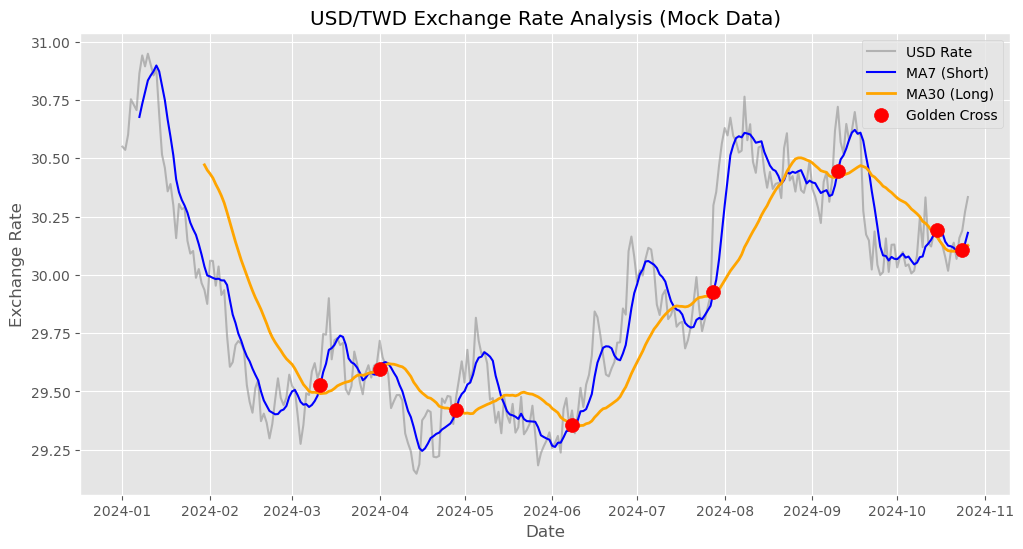

In [5]:
# --- 3. 畫圖 Visualizer ---

plt.figure(figsize=(12, 6)) # 設定圖片大小 (寬12, 高6)

# 1. 畫出原始匯率 (灰色)
plt.plot(df.index, df['USD'], label='USD Rate', color='gray', alpha=0.5)

# 2. 畫出兩條均線 (MA7 藍色, MA30 橘色)
plt.plot(df.index, df['MA7'], label='MA7 (Short)', color='blue', linewidth=1.5)
plt.plot(df.index, df['MA30'], label='MA30 (Long)', color='orange', linewidth=2)

# 3. 標註「黃金交叉」的關鍵點 (重點！)
# 先把 Golden_Cross 是 True 的那天抓出來
golden_points = df[df['Golden_Cross'] == True]

# 用散佈圖 (scatter) 在那些日期畫上紅色的點
plt.scatter(golden_points.index, golden_points['MA7'], color='red', s=100, label='Golden Cross', zorder=5)

# 加入標題與標籤，讓圖表看起來專業
plt.title('USD/TWD Exchange Rate Analysis (Mock Data)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend() # 顯示圖例 (左上角那個框框)
plt.grid(True) # 顯示格線

plt.show() # 把圖秀出來


In [6]:
import pandas as pd
import numpy as np

# --- 專案二：房貸壓力測試模擬器 ---

# 1. 定義財務數學公式 (這段就是經濟系的專業展現)
# PMT 公式：計算在固定利率下，每個月要攤還多少本金+利息
def calculate_pmt(principal, annual_rate, years):
    # 將年利率轉為月利率 (例如 2% -> 0.02 / 12)
    r = annual_rate / 12 
    # 總期數 (月)
    n = years * 12
    
    # 房貸公式：本息平均攤還
    # 每月還款 = 本金 * [月利率 * (1+月利率)^n] / [(1+月利率)^n - 1]
    monthly_payment = principal * (r * (1 + r)**n) / ((1 + r)**n - 1)
    
    return monthly_payment

# 2. 設定基本情境 (Base Case)
loan_amount = 10000000  # 貸款 1000 萬
years = 30              # 貸 30 年
current_rate = 0.022    # 目前利率 2.2%
monthly_income = 70000  # 假設客戶月薪 7 萬 (用來算收支比)

# 3. 執行壓力測試 (Stress Test)
# 我們模擬：若央行升息 0% (現況), 0.5%, 1%, 1.5%, 2%
rate_hikes = [0, 0.005, 0.010, 0.015, 0.020] 

results = [] # 準備一個空清單來裝結果

for hike in rate_hikes:
    # 新的利率 = 目前利率 + 升息幅度
    new_rate = current_rate + hike
    
    # 呼叫上面的公式算出每個月要繳多少錢
    pmt = calculate_pmt(loan_amount, new_rate, years)
    
    # 計算收支比 (DBR) = 每月還款 / 月薪
    # 銀行通常規定 DBR 不能超過 60% 或 70%，否則風險太高
    dbr = pmt / monthly_income
    
    # 判斷風險等級
    risk_status = "Safe"
    if dbr > 0.6: # 如果要繳的錢超過薪水 60%
        risk_status = "High Risk (Danger)"
    
    # 把結果存起來
    results.append({
        '升息幅度': f"+{hike*100:.1f}%",
        '模擬利率': f"{new_rate*100:.1f}%",
        '每月還款金額': int(pmt), # 取整數，比較好讀
        '每月多繳金額': int(pmt - calculate_pmt(loan_amount, current_rate, years)),
        '收支比 (DBR)': f"{dbr*100:.1f}%",
        '風險評估': risk_status
    })

# 4. 轉成 DataFrame 表格展示
stress_test_df = pd.DataFrame(results)

# 秀出這張專業的報表
stress_test_df

,升息幅度,模擬利率,每月還款金額,每月多繳金額,收支比 (DBR),風險評估
0,+0.0%,2.2%,37970,0,54.2%,Safe
1,+0.5%,2.7%,40559,2589,57.9%,Safe
2,+1.0%,3.2%,43246,5276,61.8%,High Risk (Danger)
3,+1.5%,3.7%,46028,8058,65.8%,High Risk (Danger)
4,+2.0%,4.2%,48901,10931,69.9%,High Risk (Danger)


In [7]:
import pandas as pd
import numpy as np

# --- 專案三：自動化對帳機器人 ---

# 1. 模擬製造兩份「不完美的」資料
# 公司內部帳 (資料 A)
data_internal = {
    'OrderID': ['A001', 'A002', 'A003', 'A004', 'A005'],
    'Amount': [1000, 2000, 3000, 4000, 5000],
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03']
}
df_internal = pd.DataFrame(data_internal)

# 銀行對帳單 (資料 B)
# 故意製造差異：
# 1. 少了 A002 (公司有，銀行沒有 -> 可能交易失敗)
# 2. 多了 A006 (銀行有，公司沒有 -> 可能不明入帳)
# 3. A003 金額不對 (公司記 3000，銀行扣 2990 -> 可能手續費或匯差)
data_bank = {
    'OrderID': ['A001', 'A003', 'A004', 'A005', 'A006'],
    'Amount': [1000, 2990, 4000, 5000, 6000], # 注意 A003 是 2990
    'Date': ['2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03']
}
df_bank = pd.DataFrame(data_bank)

# 2. 核心技術：使用 Merge (Outer Join) 進行全盤比對
# 這是 SQL 和 Data Analysis 最重要的概念，把兩張表依照 OrderID 拼起來
# suffixes=('_Co', '_Bank') 意思是如果欄位名稱一樣，分別加上後綴區分
merged_df = pd.merge(df_internal, df_bank, on='OrderID', how='outer', suffixes=('_Co', '_Bank'), indicator=True)

# 3. 邏輯判斷：找出差異 (Logic Optimization)
# 建立一個清單來存放對帳結果
status_list = []

for index, row in merged_df.iterrows():
    if row['_merge'] == 'left_only':
        status_list.append('異常：公司有單，銀行沒帳 (漏帳)')
    elif row['_merge'] == 'right_only':
        status_list.append('異常：銀行有帳，公司沒單 (溢帳)')
    else:
        # 如果兩邊都有，檢查金額是否一致
        if row['Amount_Co'] == row['Amount_Bank']:
            status_list.append('正常 (Matched)')
        else:
            diff = row['Amount_Co'] - row['Amount_Bank']
            status_list.append(f'異常：金額不符 (差額 {diff})')

# 將結果寫回表格
merged_df['Recon_Status'] = status_list

# 4. 只篩選出「有問題」的資料，產出差異報告 (Diff Report)
# 只要 Status 不是 '正常 (Matched)' 的都抓出來
diff_report = merged_df[merged_df['Recon_Status'] != '正常 (Matched)'].copy()

# 整理一下欄位順序，讓報告好看一點
final_report = diff_report[['OrderID', 'Amount_Co', 'Amount_Bank', 'Recon_Status']]

# 秀出這張差異報告
final_report


,OrderID,Amount_Co,Amount_Bank,Recon_Status
1,A002,2000.0,NaN,異常：公司有單，銀行沒帳 (漏帳)
2,A003,3000.0,2990.0,異常：金額不符 (差額 10.0)
5,A006,NaN,6000.0,異常：銀行有帳，公司沒單 (溢帳)
